# Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = merge_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Get the duplicate mice by ID number
duplicate = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
duplicate_mouseIDs = duplicate["Mouse ID"].unique()
duplicate_mouseIDs

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mouseIDs)== False]

# Number of mice in new dataframe
new_total_mice = clean_data_df["Mouse ID"].nunique()
new_total_mice


248

## Summary Statistics

In [5]:
#summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

# Data grouped by Drug
grouped_df = clean_data_df.groupby("Drug Regimen")

mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
stddev = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()

# Assembling the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Drug Regimen":(mean.index), "Mean Tumor Volume":(mean.values), "Median Tumor Volume":(median.values), 
                           "Tumor Volume Variance":(variance.values), "Tumor Volume Std Dev":(stddev.values), "Tumor Volume Std Error":(sem.values) })
summary_index = summary_df.set_index("Drug Regimen")
summary_index


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

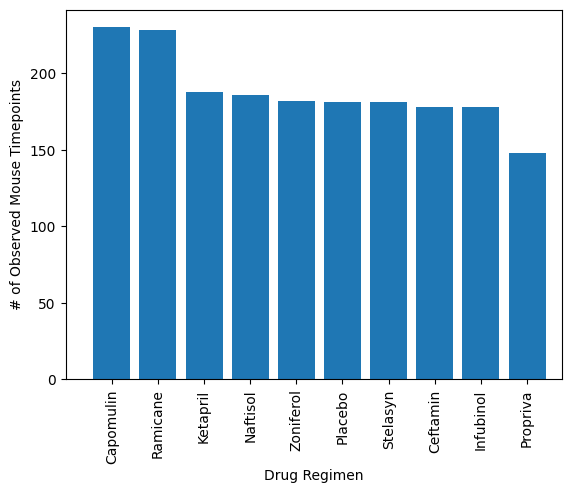

In [6]:
# Generate a bar plot showing Timepoints for each drug regimen.


timepoint_count = clean_data_df.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False)

# Determine x & y axis
x_axis = timepoint_count.index
y_axis = timepoint_count.values

# Making a bar chart using pyplot
plt.bar(x_axis, y_axis, align="center")
# Sets the x limits of the current chart
plt.xlim(-1, len(x_axis)-0.25)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


<Axes: xlabel='Drug Regimen', ylabel='No. of Timepoints'>

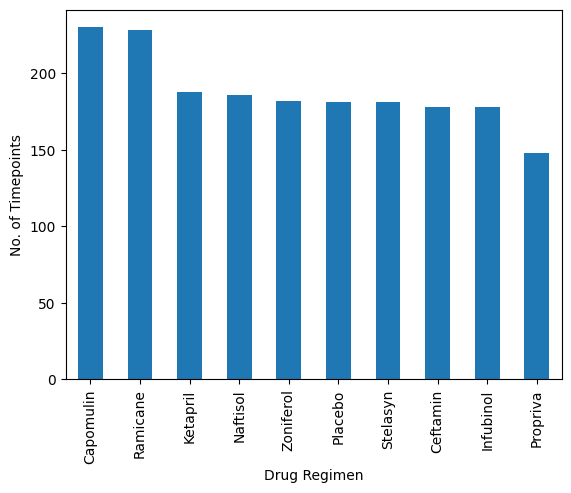

In [7]:
# Making a bar chart using pandas
timepoint_count.plot(kind='bar',ylabel='No. of Timepoints', xlabel='Drug Regimen')


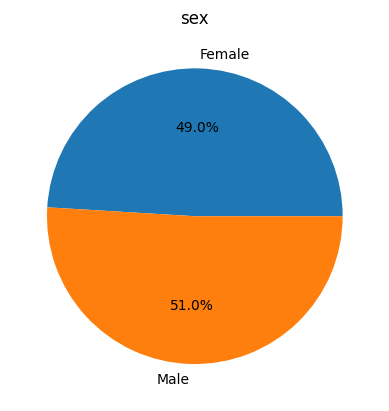

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count = clean_data_df.groupby("Sex")["Sex"].value_counts()
sex_count
plt.pie(sex_count, labels = sex_count.index, autopct="%1.1f%%")
plt.title("sex")
plt.show(block = False)


<Axes: ylabel='Sex'>

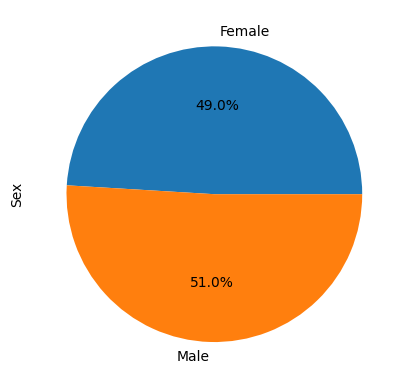

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count.plot(kind='pie', autopct="%1.1f%%", ylabel="Sex")

## Quartiles, Outliers and Boxplots

In [10]:
# Calculating the final tumor volume of each mouse across four of the Drugs:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the greatest timepoint for each mouse
mouse_grouped = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()
mouse_grouped = mouse_grouped.reset_index()

# Merging this grouped df with the original DataFrame to get the respective tumor volume 
timepoint_added_df = mouse_grouped.merge(clean_data_df, on=["Mouse ID","Timepoint"], how="left")
timepoint_added_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [11]:
# Adding drugs into a list for the for loop 
drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data
tumor_vol = []

# Calculating the IQR and determining if there are any potential outliers for the drugs in the 'drug_list'. 
for drug in drug_list:
    vol = timepoint_added_df.loc[timepoint_added_df["Drug Regimen"] == drug, "Tumor Volume (mm3)" ]
    tumor_vol.append(vol)
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = vol.loc[lambda x: (x>upper_bound) | (x<lower_bound)]
    print(f"{drug}'s potential outliers: {outlier}")
   
          



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


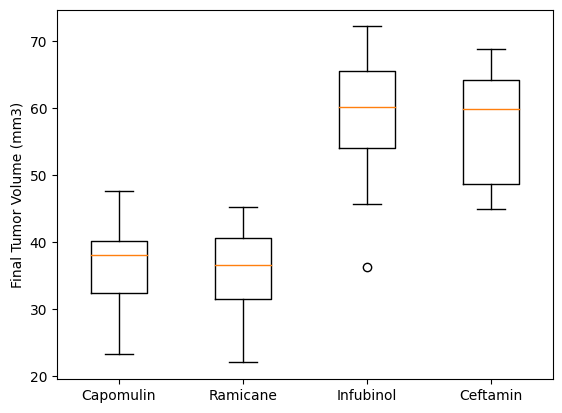

In [12]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticks(range(1,len(drug_list)+1),drug_list)
plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomilin Treatment of Mouse b128'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

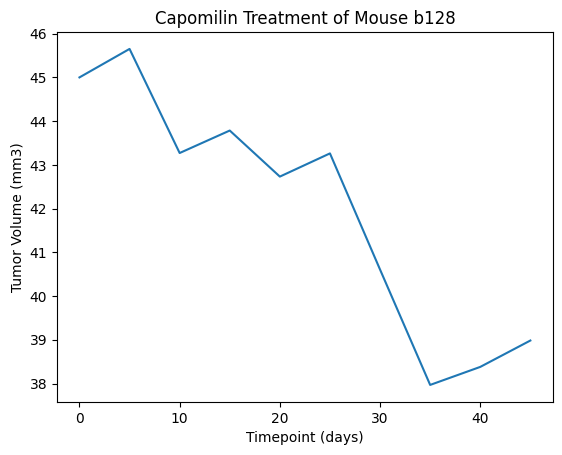

In [13]:
# Generating a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filtering data to get only the rows with drug Capomulin
Capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"]=="Capomulin"]
# Filtering to get data of a single mouse within Capomulin
single_mouse = Capomulin_df.loc[Capomulin_df["Mouse ID"]==Capomulin_df["Mouse ID"][0],
                                ["Timepoint", "Tumor Volume (mm3)"]]
# Generate the line plot using Pandas
single_mouse.plot(kind="line", x="Timepoint",y="Tumor Volume (mm3)",
                   ylabel="Tumor Volume (mm3)", xlabel="Timepoint (days)",
                   title=f'Capomilin Treatment of Mouse {Capomulin_df["Mouse ID"][0]}',
                   legend=False)

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3) Avg'>

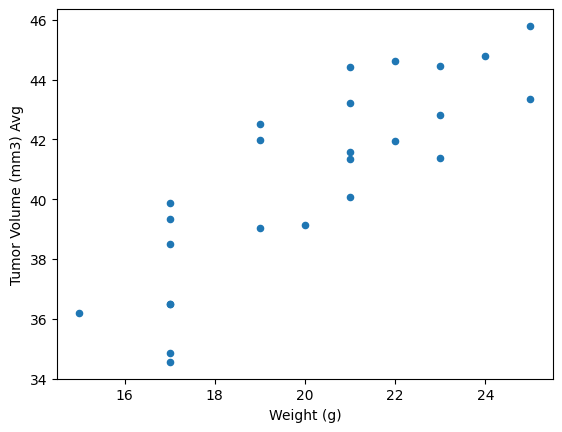

In [14]:
# Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Grouping by mouse id
mouse_grouped = Capomulin_df.groupby(["Mouse ID"])
# Get avg tumor volume of all mice from grouped data
avg_tumor = mouse_grouped["Tumor Volume (mm3)"].mean()
# Get weight of all mice from grouped data
mouse_weight = mouse_grouped.first()["Weight (g)"]
# Reset data to make it dataframe
avg_tumor_df = avg_tumor.reset_index()
mouse_weight_df = mouse_weight.reset_index()
# Merging the two dataframes
weight_avgtumor = mouse_weight_df.merge(avg_tumor_df, on="Mouse ID", how="left")
# Generating scatter plot using pandas
weight_avgtumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", ylabel="Tumor Volume (mm3) Avg")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


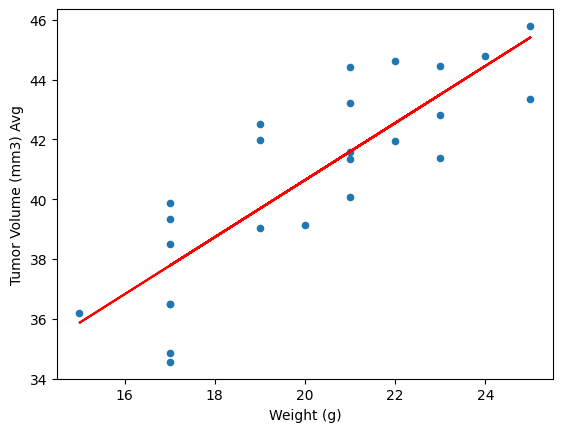

In [15]:
# Calculating the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = weight_avgtumor["Weight (g)"]
volume = weight_avgtumor["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

weight_avgtumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", ylabel="Tumor Volume (mm3) Avg")
m, b = np.polyfit(weight, volume, 1)
plt.plot(weight, m*weight+b, color='red', label='y={:.2f}x+{:.2f}'.format(m,b))
